In [31]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import f1_score

In [32]:
# Import datasets

train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
samplesubmission = pd.read_csv('SampleSubmission.csv')

In [33]:
# Check the first five rows of the train dataset

train.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,...,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,...,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,...,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,...,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,...,165,203,1,0,0,0,1,0,0,0


In [34]:
# Check the first five rows of the test dataset

test.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,ID_ZPMABNVX,1954,Graduation,Single,48556.8,0,1,11-01-2013,85,6,...,7,23,41,8,0,0,0,0,0,0
1,ID_WFE91NAA,1961,Graduation,Widow,57499.2,0,1,22-11-2012,79,5,...,0,0,75,6,0,1,0,0,0,0
2,ID_JV11RBRK,1973,Basic,Married,17025.6,0,0,28-02-2013,47,1,...,16,12,27,6,0,0,0,0,0,0
3,ID_6B7SVKY9,1970,Graduation,Together,91983.6,0,0,16-08-2013,98,1,...,219,189,126,2,0,0,1,1,0,0
4,ID_GOVUZ545,1959,Graduation,Together,78235.2,0,2,25-07-2013,41,2,...,12,0,200,5,1,0,0,0,0,0


In [35]:
# Check the the first five rows of the sample submission file

samplesubmission.head()

,ID,Response
0,ID_ZPMABNVX,NaN
1,ID_WFE91NAA,NaN
2,ID_JV11RBRK,NaN
3,ID_6B7SVKY9,NaN
4,ID_GOVUZ545,NaN


In [36]:
# Shape of the train dataset

train.shape

(1568, 27)

In [37]:
# Shape of the test dataset

test.shape

(672, 26)

In [38]:
# Selected the target column

target = [col for col in train.columns if col not in test.columns]

target

['Response']

In [39]:
# Counted the values of each classs in the target column

count = train['Response'].value_counts()

count

0    1329
1     239
Name: Response, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

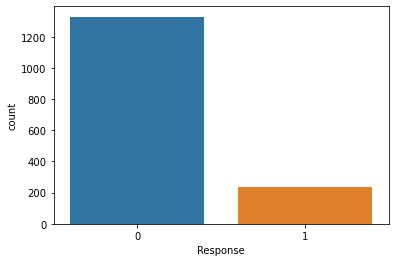

In [40]:
# Plot of hte target column

plot = sns.countplot(train['Response'])
plot.set_xticklabels([0, 1])
plt.show

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

In [42]:
# Description of the train dataset

train.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
count,1568.000000,1552.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,...,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,1970.073342,62381.186598,0.460459,0.497449,55.408801,2.292730,4.001276,2.665816,5.703444,303.190051,...,26.800383,43.739158,5.326531,0.072704,0.072704,0.080357,0.064413,0.012755,0.008291,0.152423
std,11.920781,32089.169563,0.540361,0.544151,28.788037,1.937544,2.773748,3.043493,3.260553,340.141396,...,40.857657,51.591557,2.468023,0.259733,0.259733,0.271932,0.245566,0.112252,0.090705,0.359546
min,1900.000000,2076.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,41612.400000,0.000000,0.000000,31.000000,1.000000,2.000000,0.000000,3.000000,27.000000,...,1.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1971.000000,60964.200000,0.000000,0.000000,56.000000,2.000000,3.000000,2.000000,5.000000,167.000000,...,8.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1979.000000,81493.200000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,499.500000,...,33.000000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,799999.200000,2.000000,2.000000,106.000000,15.000000,27.000000,28.000000,13.000000,1498.000000,...,263.000000,362.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       672 non-null    object 
 1   Year_of_Birth            672 non-null    int64  
 2   Education_Level          672 non-null    object 
 3   Marital_Status           672 non-null    object 
 4   Disposable_Income        664 non-null    float64
 5   No_of_Kids_in_home       672 non-null    int64  
 6   No_of_Teen_in_home       672 non-null    int64  
 7   Date_Customer            672 non-null    object 
 8   Recency                  672 non-null    int64  
 9   Discounted_Purchases     672 non-null    int64  
 10  WebPurchases             672 non-null    int64  
 11  CatalogPurchases         672 non-null    int64  
 12  StorePurchases           672 non-null    int64  
 13  Amount_on_Wines          672 non-null    int64  
 14  Amount_on_Fruits         6

<AxesSubplot:>

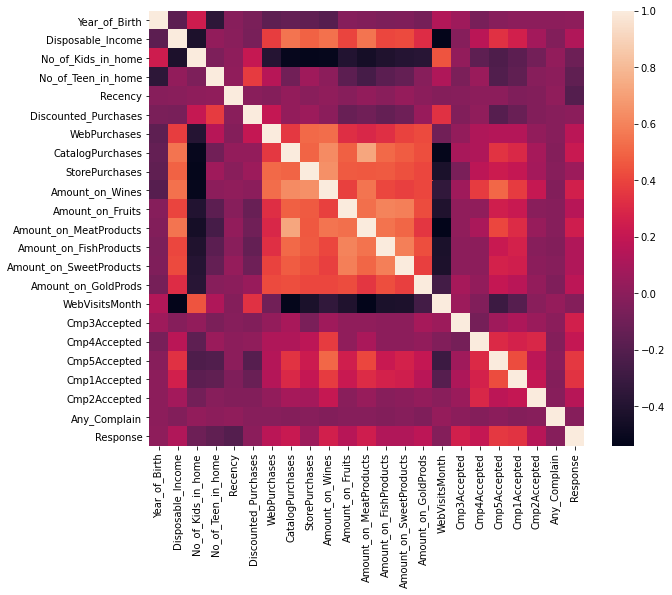

In [44]:
# Heatmap visualization of the train dataset

corrmat = train.corr()
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrmat, square=True)

In [45]:
# Selected the categorical features from the train dataset

cat_feat = [feat for feat in train.columns if train[feat].dtype == 'O']

cat_feat

['ID', 'Education_Level', 'Marital_Status', 'Date_Customer']

In [46]:
# Selected the numerical features from the train dataset

num_feat = [feat for feat in train.columns if feat not in cat_feat]

num_feat

['Year_of_Birth',
 'Disposable_Income',
 'No_of_Kids_in_home',
 'No_of_Teen_in_home',
 'Recency',
 'Discounted_Purchases',
 'WebPurchases',
 'CatalogPurchases',
 'StorePurchases',
 'Amount_on_Wines',
 'Amount_on_Fruits',
 'Amount_on_MeatProducts',
 'Amount_on_FishProducts',
 'Amount_on_SweetProducts',
 'Amount_on_GoldProds',
 'WebVisitsMonth',
 'Cmp3Accepted',
 'Cmp4Accepted',
 'Cmp5Accepted',
 'Cmp1Accepted',
 'Cmp2Accepted',
 'Any_Complain',
 'Response']

In [47]:
# Selected the first five rows of the numerical features in the train dataset

train[num_feat].head()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,1955,77504.4,1,1,56,2,1,1,4,71,...,6,20,3,0,0,0,0,0,0,0
1,1958,56784.0,0,1,17,6,5,1,8,205,...,15,19,6,0,0,0,0,0,0,0
2,1962,103714.8,0,0,17,0,7,4,7,469,...,18,37,2,0,0,0,1,0,0,1
3,1979,46311.6,1,0,49,3,4,1,3,56,...,24,24,8,0,0,0,0,0,0,0
4,1959,87486.0,0,0,59,1,3,7,9,412,...,165,203,1,0,0,0,1,0,0,0


In [48]:
# Removed the target column from the numerical features in the train dataset

rem = ['Response']
for i in rem:
    num_feat.remove(i)
num_feat

['Year_of_Birth',
 'Disposable_Income',
 'No_of_Kids_in_home',
 'No_of_Teen_in_home',
 'Recency',
 'Discounted_Purchases',
 'WebPurchases',
 'CatalogPurchases',
 'StorePurchases',
 'Amount_on_Wines',
 'Amount_on_Fruits',
 'Amount_on_MeatProducts',
 'Amount_on_FishProducts',
 'Amount_on_SweetProducts',
 'Amount_on_GoldProds',
 'WebVisitsMonth',
 'Cmp3Accepted',
 'Cmp4Accepted',
 'Cmp5Accepted',
 'Cmp1Accepted',
 'Cmp2Accepted',
 'Any_Complain']

In [49]:
# Selected the first five rows of the numerical features of the train dataset

train[num_feat].head()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,1955,77504.4,1,1,56,2,1,1,4,71,...,0,6,20,3,0,0,0,0,0,0
1,1958,56784.0,0,1,17,6,5,1,8,205,...,50,15,19,6,0,0,0,0,0,0
2,1962,103714.8,0,0,17,0,7,4,7,469,...,29,18,37,2,0,0,0,1,0,0
3,1979,46311.6,1,0,49,3,4,1,3,56,...,17,24,24,8,0,0,0,0,0,0
4,1959,87486.0,0,0,59,1,3,7,9,412,...,181,165,203,1,0,0,0,1,0,0


In [50]:
# Description of the train's numerical features

train[num_feat].describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
count,1568.000000,1552.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,...,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,1970.073342,62381.186598,0.460459,0.497449,55.408801,2.292730,4.001276,2.665816,5.703444,303.190051,...,37.166454,26.800383,43.739158,5.326531,0.072704,0.072704,0.080357,0.064413,0.012755,0.008291
std,11.920781,32089.169563,0.540361,0.544151,28.788037,1.937544,2.773748,3.043493,3.260553,340.141396,...,53.994951,40.857657,51.591557,2.468023,0.259733,0.259733,0.271932,0.245566,0.112252,0.090705
min,1900.000000,2076.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,41612.400000,0.000000,0.000000,31.000000,1.000000,2.000000,0.000000,3.000000,27.000000,...,3.000000,1.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1971.000000,60964.200000,0.000000,0.000000,56.000000,2.000000,3.000000,2.000000,5.000000,167.000000,...,12.000000,8.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1979.000000,81493.200000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,499.500000,...,49.250000,33.000000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,799999.200000,2.000000,2.000000,106.000000,15.000000,27.000000,28.000000,13.000000,1498.000000,...,259.000000,263.000000,362.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
# Description of the test's numerical features

test[num_feat].describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
count,672.000000,664.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,...,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,1969.181548,63434.170482,0.406250,0.526786,57.744048,2.400298,4.279762,2.653274,5.992560,322.342262,...,38.363095,27.675595,44.681548,5.293155,0.072917,0.078869,0.055060,0.063988,0.014881,0.011905
std,12.116416,25276.585476,0.532259,0.545293,29.321893,1.919125,2.782585,2.622899,3.221797,328.037431,...,56.112424,42.275184,53.520249,2.328867,0.260193,0.269735,0.228266,0.244914,0.121167,0.108538
min,1894.000000,5313.600000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,44219.700000,0.000000,0.000000,33.000000,1.000000,2.000000,1.000000,3.000000,35.750000,...,2.750000,2.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,64007.400000,0.000000,1.000000,58.000000,2.000000,4.000000,2.000000,5.000000,209.500000,...,11.000000,9.000000,24.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1978.000000,83466.300000,1.000000,1.000000,84.000000,3.000000,6.000000,4.000000,8.000000,514.750000,...,50.000000,33.250000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,194876.400000,2.000000,2.000000,106.000000,15.000000,25.000000,11.000000,13.000000,1483.000000,...,250.000000,198.000000,321.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
# Checked for missing data in the train dataset

print(train[num_feat].isnull().sum())

Year_of_Birth               0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
dtype: int64


In [53]:
# Filled the missing rows with median

updated_train = train
updated_train['Disposable_Income'] = updated_train['Disposable_Income'].fillna(updated_train['Disposable_Income'].median())

In [54]:
updated_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1568 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

In [55]:
# Confirmed the missing rows has been filled up

print(updated_train[num_feat].isnull().sum())

Year_of_Birth              0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64


In [56]:
# Checked for missing data in the test dataset

print(test[num_feat].isnull().sum())

Year_of_Birth              0
Disposable_Income          8
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64


In [57]:
# Filled the missing rows in the test dataset with median

updated_test = test
updated_test['Disposable_Income']=updated_test['Disposable_Income'].fillna(updated_test['Disposable_Income'].median())

print(updated_test[num_feat].isnull().sum())

Year_of_Birth              0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64


In [58]:
updated_train[num_feat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_of_Birth            1568 non-null   int64  
 1   Disposable_Income        1568 non-null   float64
 2   No_of_Kids_in_home       1568 non-null   int64  
 3   No_of_Teen_in_home       1568 non-null   int64  
 4   Recency                  1568 non-null   int64  
 5   Discounted_Purchases     1568 non-null   int64  
 6   WebPurchases             1568 non-null   int64  
 7   CatalogPurchases         1568 non-null   int64  
 8   StorePurchases           1568 non-null   int64  
 9   Amount_on_Wines          1568 non-null   int64  
 10  Amount_on_Fruits         1568 non-null   int64  
 11  Amount_on_MeatProducts   1568 non-null   int64  
 12  Amount_on_FishProducts   1568 non-null   int64  
 13  Amount_on_SweetProducts  1568 non-null   int64  
 14  Amount_on_GoldProds     

In [59]:
# Imported Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

In [60]:
# Imported imbalance learn library

import imblearn

In [61]:
# Performed under sampling on the train dataset

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(updated_train[num_feat], updated_train.Response)

print(updated_train.Response.value_counts())
print(y_rus.value_counts())

0    1329
1     239
Name: Response, dtype: int64
0    239
1    239
Name: Response, dtype: int64


In [62]:
# Scaled the features in the dataset

scaler = StandardScaler()
cols = num_feat
X = scaler.fit_transform(x_rus)
testing = scaler.transform(updated_test[num_feat])
X = pd.DataFrame(data=X, columns=cols)
testing = pd.DataFrame(data=testing, columns=cols)

X.head()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,0.235252,-0.834029,1.083408,-0.764214,-0.186634,-0.168418,-1.209905,-0.674611,-0.853947,-0.926696,...,-0.547820,-0.669685,-0.783655,-0.980907,-0.393179,-0.360588,-0.448336,-0.424555,-0.167203,-0.102815
1,-1.887992,0.230549,2.966568,1.148322,0.508969,2.199340,1.260103,-0.378229,-0.235951,0.096919,...,-0.735373,-0.715223,-0.783655,0.661382,-0.393179,-0.360588,-0.448336,2.355408,-0.167203,-0.102815
2,0.153588,-0.233348,-0.799752,1.148322,-0.221414,1.725788,-0.504189,-0.378229,1.309041,0.578172,...,1.310660,1.834907,-0.203772,1.482527,-0.393179,-0.360588,-0.448336,-0.424555,-0.167203,-0.102815
3,1.868516,-0.355230,-0.799752,-0.764214,-1.021357,-0.641969,-0.151330,-0.378229,-0.544949,-0.544750,...,-0.394368,-0.624147,-0.660649,-0.570335,-0.393179,-0.360588,-0.448336,-0.424555,-0.167203,-0.102815
4,1.460200,-0.238507,1.083408,-0.764214,1.691494,0.305134,0.201528,-0.674611,0.382046,-0.720445,...,1.003755,1.060760,-0.818799,0.661382,-0.393179,-0.360588,-0.448336,-0.424555,-0.167203,-0.102815


In [125]:
# Splited the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y_rus, stratify=y_rus, test_size=0.20, random_state=42)

In [126]:
# Fit the train into the model

rmmodel = RandomForestClassifier(n_estimators=100)
rmmodel.fit(X_train, y_train)

RandomForestClassifier()

In [127]:
# Made predictions

pred1 = rmmodel.predict(X_test)
pred2 = rmmodel.predict(X_train)

In [128]:
# Scored predictions using f1_score

print('Training Set')
print('classifier f1_score {}'.format(f1_score(y_train,pred2)))
print(" ")
print('Testing Set')
print('classifier f1_score {}'.format(f1_score(y_test,pred1)))

Training Set
classifier f1_score 1.0
 
Testing Set
classifier f1_score 0.7872340425531915


In [71]:
samplesubmission.head()

,ID,Response
0,ID_ZPMABNVX,NaN
1,ID_WFE91NAA,NaN
2,ID_JV11RBRK,NaN
3,ID_6B7SVKY9,NaN
4,ID_GOVUZ545,NaN


In [72]:
# Made a copy of the sample submission file

submission_file = samplesubmission.copy()

In [73]:
# Made prediction using the test dataset

print(rmmodel.predict(updated_test[num_feat]))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [74]:
# Scaled the test dataset

submission_file.Response = rmmodel.predict(scaler.transform(updated_test[num_feat]))

In [75]:
# Printed the the output of the prediction

submission_file.head()

,ID,Response
0,ID_ZPMABNVX,0
1,ID_WFE91NAA,1
2,ID_JV11RBRK,0
3,ID_6B7SVKY9,1
4,ID_GOVUZ545,0


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


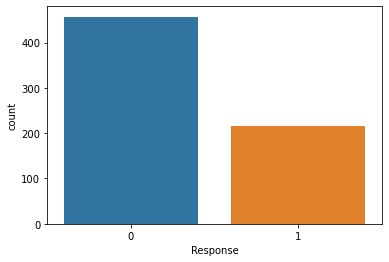

In [76]:
sns.countplot(submission_file.Response)
plt.show()

In [72]:
# Saved the prediction into a csv file

submission_file.to_csv('submission', index=False)